# Embeddings


## Introduction
This notebook demonstrates how to download a dataset from Hugging Face, generate embeddings using a pre-trained model, and search for similar images based on these embeddings.

## Table of Contents
1. [Import Libraries](#import-libraries)
2. [Download Dataset](#download-dataset)
3. [Generate Embeddings](#generate-embeddings)
4. [Display Random Image](#display-random-image)
5. [Search Similar Images](#search-similar-images)

## Import Libraries


In [ ]:
# from cv import Embeddings
from zensvi.cv import Embeddings


import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import math



In [2]:
# install dependecies [to be depricated in v1.0]
# %pip install faiss-cpu
# %pip install img2vec_pytorch
# %pip install --upgrade jupyter
# %pip install --upgrade ipywidgets

## Download dataset
Skip this step if you have already your own dataset

In [ ]:
from huggingface_hub import HfApi, hf_hub_download
def download_folder(repo_id, repo_type, folder_path, local_dir):
    """
    Download an entire folder from a huggingface dataset repository.
    repo_id : string
        The ID of the repository (e.g., 'username/repo_name').
    repo_type : string
        Type of the repo, dataset or model.
    folder_path : string
        The path to the folder within the repository.
    local_dir : string
        Local folder to download the data. This mimics git behaviour
    """
    api = HfApi()
    # list all files in the repo, keep the ones within folder_path
    all_files = api.list_repo_files(repo_id, repo_type=repo_type)
    files_list = [f for f in all_files if f.startswith(folder_path)]

    # download each of those files
    for file_path in files_list:
        hf_hub_download(repo_id=repo_id, repo_type=repo_type,
                        filename=file_path, local_dir=local_dir)
        
# Download demo data
repo_id = "NUS-UAL/zensvi_test_data" # you can replace this for other huggingface repos
repo_type = "dataset" # required by the API when the repo is a dataset
folder_path = "input" # replace the folder you want within the repo 
local_dir = "images/" # the local folder in your computer where it will be downloaded


download_folder(repo_id, repo_type, folder_path, local_dir)



## Generate Embeddings
Generate embeddings for the images in the specified folder.


In [62]:
emb = Embeddings(model_name="resnet-18", cuda=False)

source_images_path = "./images/input/visualization/batch_images/batch_1"
output_embeddings_path = "./images/input/embeddings"

emb.generate_embedding(
    source_images_path,
    output_embeddings_path,
    batch_size=20,
)



/Users/mahmoudouf/Documents/Github/zensvi_tutorial/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/mahmoudouf/Documents/Github/zensvi_tutorial/venv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Total number of images:  100
Number of batches:  5


Progress: 100%|███████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.54it/s]


True

## Display Random Image

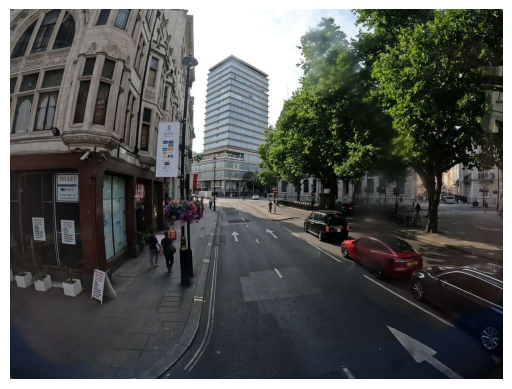

In [93]:
# select any random image from the source_images_path and plot it 

def get_random_image(source_images_path):
    all_images = os.listdir(source_images_path)
    random_image_name = np.random.choice(all_images)
    random_image_path = os.path.join(source_images_path, random_image_name)
    random_image = cv2.imread(random_image_path)
    random_image = cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB)
    # remove the extension from the image
    random_image_key = random_image_name.split(".")[0]
    return random_image, random_image_key

random_image, random_image_key = get_random_image(source_images_path)

plt.imshow(random_image)
plt.axis("off")
plt.show()



## Search Similar Images

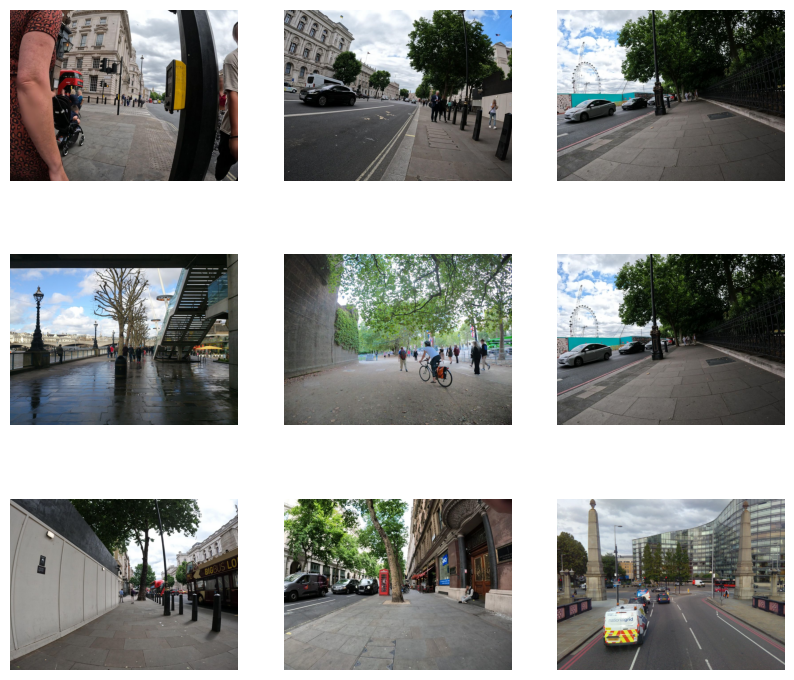

In [ ]:

import math

results = emb.search_similar_images(random_image_key, output_embeddings_path, 9)


def display_images(results, source_images_path):
    images = []
    for result in results:
        image_path = os.path.join(source_images_path, result[2])
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    num_plots = len(results)
    num_cols = 3
    num_rows = math.ceil(num_plots / num_cols)

    # Create the subplots dynamically
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(10,3 * num_rows))

    # Flatten the axs array for easy iteration if necessary
    axs = axs.flatten()
    axs = axs.ravel()
    for i, image in enumerate(images):
        axs[i].imshow(image)
        axs[i].axis("off")
    plt.show()

display_images(results, source_images_path)